# 赛题介绍

汽车领域多语种迁移学习挑战赛

比赛链接:[点击直达](https://challenge.xfyun.cn/topic/info?type=car-multilingual&ch=ds22-dw-zmt07)

举办方：科大讯飞股份有限公司

## 赛事背景
国内车企为提升产品竞争力、更好走向海外市场，提出了海外市场智能交互的需求。但世界各国在“数据安全”上有着严格法律约束，要做好海外智能化交互，本土企业面临的最大挑战是数据缺少。本赛题要求选手通过NLP相关人工智能算法来实现汽车领域多语种迁移学习。

## 赛事任务
本次迁移学习任务中，讯飞智能汽车BU将提供较多的车内人机交互中文语料，以及少量的中英、中日、中阿平行语料作为训练集，参赛选手通过提供的数据构建模型，进行意图分类及关键信息抽取任务，最终使用英语、日语、阿拉伯语进行测试评判。

1. 初赛

训练集：中文语料30000条，中英平行语料1000条，中日平行语料1000条

测试集A：英文语料500条，日文语料500条

测试集B：英文语料500条，日文语料500条

2. 复赛

训练集：中文语料同初赛，中阿拉伯平行语料1000条

测试集A：阿拉伯文语料500条

测试集B：阿拉伯文语料500条

## 数据说明
本次比赛为参赛选手提供三类车内交互功能语料，其中包括命令控制类、导航类、音乐类。较多的中文语料和较少的多语种平行语料均带有意图分类和关键信息，选手需充分利用所提供数据，在英、日、阿拉伯语料的意图分类和关键信息抽取任务上取得较好效果。数据所含标签种类及取值类型如下表所示。

|变量|数值格式|解释|
|---|--- |---|
|intent|数值格式|解释|
|intent	|string	|整句意图标签|
|device|string	|操作设备名称标签|
|mode|string	|操作设备模式标签|
|offset|string	|操作设备调节量标签|
|endloc	|string	|目的地标签|
|landmark|string|周边搜索参照标签|
|singer	|string	|歌手|
|song	|string	|歌曲|

## 评估指标
本模型依据提交的结果文件，采用accuracy进行评价。

(1)意图分类accuracy = 意图正确数目 / 总数据量

(2)关键信息抽取accuracy = 关键信息完全正确数目 / 总数据量

注：

每条数据的关键信息多抽或者少抽均算错误，最终得分取意图分类和关键信息抽取的平均值；

预测过程中不得进行语种转换，必须使用测试集提供的语种直接进行意图分类和关键信息抽取任务。

3.评测及排行
1、本赛题均提供下载数据，选手在本地进行算法调试，在比赛页面提交结果。

2、每支团队每天最多提交3次。

3、排行按照得分从高到低排序，排行榜将选择团队的历史最优成绩进行排名。

## 作品提交要求
1、文件格式：按照excel格式提交

2、文件大小：无要求

3、提交次数限制：每支队伍每天最多3次

4、文件详细说明：

1) 以excel格式提交，编码为UTF-8，第一行为表头；

2) 具体格式见提交示例，其中初赛包含两个sheet，复赛包含一个sheet

5、不需要上传其他文件

## 赛程规则
本赛题实行二轮赛制

初赛 6月24日——7月24日
1、初赛一阶段：6月24日到7月22日。

初赛二阶段：7月23日到7月24日。系统将在7月23日00：00更换测试数据，参赛队伍需要再次下载数据

2、该赛题将第二阶段成绩以参赛团队在规定时间段内的最优成绩为准

3、第二阶段结果提交截止日期为7月24日17：00。

复赛 7月27日——8月27日
1、初赛二阶段排名前20%的团队晋级复赛，大赛官网将公示团队信息。选手通过大赛官网下载新增的训练集和开发集，本地调试算法，在线提交结果。

2、复赛一阶段：7月27日到8月25日。

复赛二阶段：8月26日到8月27日。系统将在8月26日00：00更换测试数据，参赛队伍需要再次下载数据

2、该赛题将第二阶段成绩以参赛团队在规定时间段内的最优成绩为准

3、第二阶段结果提交截止日期为8月27日17：00。

# 赛题思路
本赛题存在两个子任务，一是意图识别任务（文本分类），二是槽值识别任务（命名实体识别），在数据上仅提供少量的中文平行语料和大量中文语料，存在低资源、跨语言、多任务、类别不平衡等特点。

思路上可以采用两种模型分别解决两个子任务，也可以使用单一模型联合解决两个子任务，模型侯建安装文本分类和命名实体识别的方法进行搭建。

本文Baseline采用后者方案，单一模型的选取上使用多语言预训练模型联合解决两个子任务。

在多语言预训练模型上可以选择常用的`bert-base-multilingual-uncased`和`bert-base-multilingual-cased`等多语言预训练模型。


## Baseline效果

|Model|线下|线上|
|---|---|---|
|bert-base-multilingual-cased|0.95771|0.74961|
|bert-base-multilingual-uncased|0.96269|0.75622|

![](https://ai-studio-static-online.cdn.bcebos.com/b6bdd2997b52401cb07126626b3d71877d21b6644a2f4162be98d92816873a53)


## 后续优化推荐

- 使用FGM、PGD等对抗训练
- 更换损失函数，使用Focal loss / Dice loss等尝试缓解类别不平衡的影响
- 使用EMA提升模型表现
- 使用CRF提升slot识别效果
- 构建平行预料和中文语料之间的联系


In [1]:
# 更新paddlenlp
!pip install paddlenlp==2.3.3
# langid判别语言类型
!pip install langid

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.3/362.3 kB 3.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 1.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 2.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 271.3 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 1.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.0/101.0 kB 170.0 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12

In [2]:
#  导入依赖
import os
import json
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import langid
import paddle
import paddlenlp
import paddle.nn.functional as F
from functools import partial
from paddlenlp.data import Stack, Dict, Pad
from paddlenlp.datasets import load_dataset
from paddlenlp.transformers.bert.tokenizer import BertTokenizer
import matplotlib.pyplot as plt
import seaborn as sns

# 0 参数设置

In [3]:
# 设定随机种子,固定结果
seed = 1234
def set_seed(seed):
    paddle.seed(seed)
    random.seed(seed)
    np.random.seed(seed)
set_seed(seed)

In [4]:
# 超参数设置，为了便于后续方案优化，将下方所有分散的超参数整合在本cell中
# 注意：修改此处的超参数并不能生效，需要手动删除下方演示的超参数，再通过本cell控制超参数调优
MODEL_NAME = 'bert-base-multilingual-cased' # bert-base-multilingual-cased
# 设置最大文本长度
max_seq_length = 48
# batch size这里设置
intent_train_batch_size = 32
intent_valid_batch_size = 32
intent_test_batch_size = 32
# pad slot时设置igore_label的值
ignore_label = -100
# 训练过程中的最大学习率
learning_rate = 5e-5
# 训练轮次
epochs = 10
# 学习率预热比例
warmup_proportion = 0.1
# 权重衰减系数，类似模型正则项策略，避免模型过拟合
weight_decay = 0.01
max_grad_norm = 1.0
# 训练结束后，存储模型参数
save_dir_curr = "checkpoint/intent_model"
# 记录训练epoch、损失等值
loggiing_print = 50
loggiing_eval = 50
# 提交文件名称
sumbit_excel_name = "work/submit_tsetA.xlsx"

# 1 读取数据和EDA
## 1.1 读取数据

In [5]:
# 查看数据

japan_train = pd.read_excel('data/data154631/日语_train.xlsx')
en_train = pd.read_excel('data/data154631/英文_train.xlsx')
zh_train = pd.read_excel('data/data154631/中文_trian.xlsx')
test_en =  pd.read_excel('data/data154631/testA.xlsx',sheet_name='英文_testA')
test_japan =  pd.read_excel('data/data154631/testA.xlsx',sheet_name='日语_testA')
test = pd.concat([test_en,test_japan],axis=0)

## 1.2 统计意图标签

In [6]:
JAPAN_INTENT_LIST = list(set(japan_train['意图']))
print("日语训练集共%d条\t意图标签数目%d个" % (japan_train.shape[0],len(JAPAN_INTENT_LIST)))
EN_INTENT_LIST = list(set(en_train['意图']))
print("英文训练集共%d条\t意图标签数目%d个" % (en_train.shape[0],len(EN_INTENT_LIST)))
ZH_INTENT_LIST = list(set(zh_train['意图']))
print("中文训练集共%d条\t意图标签数目%d个" % (zh_train.shape[0],len(ZH_INTENT_LIST )))
print("测试集共%d条" % (test.shape[0]))
# 意图标签
INTENT_LIST = list(set(EN_INTENT_LIST + ZH_INTENT_LIST + EN_INTENT_LIST))
print(f"意图标签共{len(INTENT_LIST)}个\n分别有{INTENT_LIST}")
len(set(JAPAN_INTENT_LIST) & set(ZH_INTENT_LIST)),len(set(JAPAN_INTENT_LIST) & set(EN_INTENT_LIST)),len(set(ZH_INTENT_LIST) & set(EN_INTENT_LIST)),len(INTENT_LIST)

日语训练集共1002条	意图标签数目17个
英文训练集共1001条	意图标签数目17个
中文训练集共32275条	意图标签数目17个
测试集共1291条
意图标签共18个
分别有['open_collect_music', 'adjust_ac_temperature_to_number', 'collect_music', 'navigate_landmark_poi', 'open_ac_mode', 'open_ac', 'close_ac', 'adjust_ac_windspeed_to_number', 'view_trans', 'raise_ac_temperature_little', 'play_collect_music', 'navigate_poi', 'close_car_device', 'map_control_query', 'open_car_device', 'lower_ac_temperature_little', 'map_control_confirm', 'music_search_artist_song']


(16, 17, 16, 18)

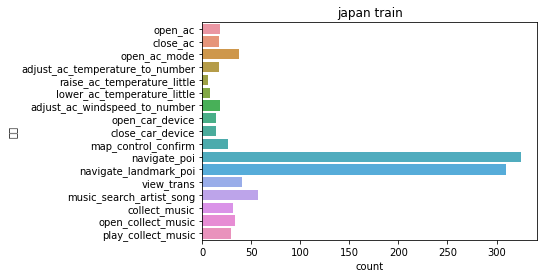

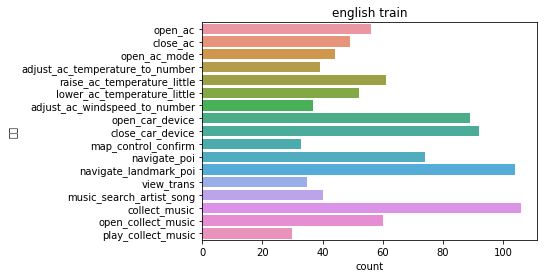

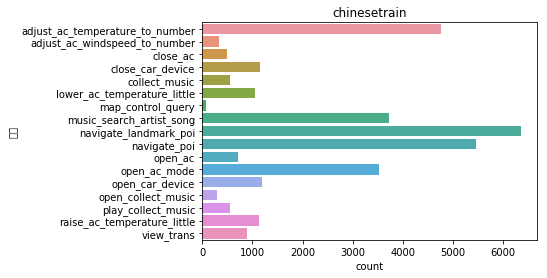

In [7]:
# 统计 label_i 的数目
plt.title("japan train")
sns.countplot(y='意图',data=japan_train)
plt.show()
plt.title("english train")
sns.countplot(y='意图',data=en_train)
plt.show()
plt.title("chinesetrain")
sns.countplot(y='意图',data=zh_train)
plt.show()

## 1.3 统计Slot标签

In [9]:
# 统计slot标签
SLOT_LIST = set()
SLOT_LIST.add('O')
for idx,rows in japan_train.iterrows():
    if rows['槽值1'] is not np.NaN:
        slot_name = (rows["意图"] +"-"+ rows["槽值1"].split(":")[0])
        SLOT_LIST.add(slot_name)
    if rows['槽值2'] is not np.NaN:   
        slot_name = (rows["意图"] +"-"+ rows["槽值2"].split(":")[0])
        SLOT_LIST.add(slot_name)
for idx,rows in en_train.iterrows():
    if rows['槽值1'] is not np.NaN:
        slot_name = (rows["意图"] +"-"+ rows["槽值1"].split(":")[0])
        SLOT_LIST.add(slot_name)
    if rows['槽值2'] is not np.NaN:   
        slot_name = (rows["意图"] +"-"+ rows["槽值2"].split(":")[0])
        SLOT_LIST.add(slot_name)
for idx,rows in zh_train.iterrows():
    if rows['槽值1'] is not np.NaN:
        slot_name = (rows["意图"] +"-"+ rows["槽值1"].split(":")[0])
        SLOT_LIST.add(slot_name)
    if rows['槽值2'] is not np.NaN:   
        slot_name = (rows["意图"] +"-"+ rows["槽值2"].split(":")[0])
        SLOT_LIST.add(slot_name)
SLOT_LIST = list(set(SLOT_LIST))
SLOT_LIST = sorted(SLOT_LIST)
print(f"intent-slot标签共{len(SLOT_LIST)}个\n分别是{SLOT_LIST}")

intent-slot标签共11个
分别是['O', 'adjust_ac_temperature_to_number-offset', 'adjust_ac_windspeed_to_number-offset', 'close_car_device-device', 'music_search_artist_song-singer', 'music_search_artist_song-song', 'navigate_landmark_poi-landmark', 'navigate_landmark_poi-poi', 'navigate_poi-poi', 'open_ac_mode-mode', 'open_car_device-device']


## 1.4 统计文本长度

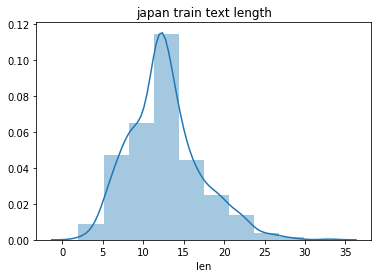

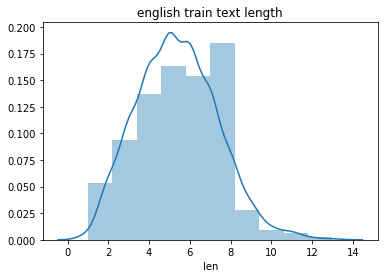

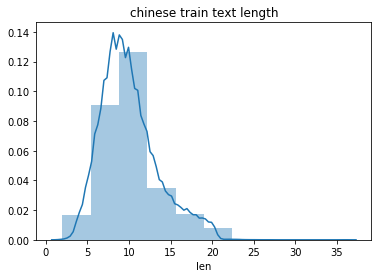

In [10]:
japan_train['len'] = [len(i) for i in japan_train["原始文本"]]
plt.title("japan train text length")
sns.distplot(japan_train['len'],bins=10)
plt.show()

en_train['len'] = [len(i.split(" ")) for i in en_train["原始文本"]]
plt.title("english train text length")
sns.distplot(en_train['len'],bins=10)
plt.show()

zh_train['len'] = [len(i) for i in zh_train["原始文本"]]
plt.title("chinese train text length")
sns.distplot(zh_train['len'],bins=10)
plt.show()

EDA结果：

- 在三类训练预料中意图标签极度不平衡
- 原始文本中并不是每一个文本都包含slot标签，slot标签也是不平衡的
- 文本长度的最大值均未超过40,在max_len的选择上不要设置太大,本文选取48作为max_len值，可能并非最优max_len

# 2 处理数据集

## 2.1 划分训练集和验证集
- 分割日文训练集和英文训练集作为验证集,剩余日英数据集为训练集（简单融合过所有中文训练集但效果很差，先使用低资源训练集得到Baseline）
- 分割比例8:2

In [11]:
# 使用sklearn的train_test_split划分数据集
intent_train_dataset1,intent_validation_dataset1 = train_test_split(japan_train, test_size=0.2, random_state=seed)
intent_train_dataset2,intent_validation_dataset2 = train_test_split(en_train, test_size=0.2, random_state=seed)
# 整合验证集
intent_validation_dataset = pd.concat([intent_validation_dataset1,intent_validation_dataset2],axis=0)
# 整合训练集
intent_train_dataset = pd.concat([intent_train_dataset1,intent_train_dataset2],axis=0)
# intent_train_dataset = pd.concat([intent_train_dataset,zh_train],axis=0)
intent_train_dataset.shape,intent_validation_dataset.shape

((1601, 6), (402, 6))

## 2.2 数据预处理和编码
- 意图识别任务的编码较为容易，统一为{'texts':[],'intent_labels':[]}
- Slot(槽值)识别任务采用简化的BIO编码,对于slot位置编码对应的slot类别，对于非slot位置使用'O'编码，如下所示
```
'目','O'
'的','O'
'地','O'
'を','O' 
'阿','navigate_poi-poi' 
'波','navigate_poi-poi' 
'加','navigate_poi-poi' 
'茂','navigate_poi-poi' 
'駅','navigate_poi-poi' 
'に','O'
'設','O'
'定','O'
'す','O'
'る','O'
```
其中`navigate_poi-poi`的前半部分由意图组成,后半部分由slot组成，通过"-"连接，即navigate_poi为意图，poi是槽值名，这样设计易于统计所有意图和slot的组合。

baseline后续联合训练方式，因此将意图标签和slot标签合并，处理后的训练数据如下：
```python
{
 'words': ['目', '的', '地', 'を', '阿', '波', '加', '茂', '駅', 'に', '設', '定', 'す', 'る'],
 'intents': 'navigate_poi', 
 'slots': ['O', 'O', 'O', 'O', 'navigate_poi-poi', 'navigate_poi-poi', 'navigate_poi-poi', 'navigate_poi-poi', 'navigate_poi-poi', 'O', 'O', 'O', 'O', 'O']
}
```


In [12]:
# 设置准备拉取的预训练模型名称
# 准备了两个模型
# 1.bert-base-multilingual-cased:BERT多语言预训练模型，cased 区分大小写
# 2.bert-base-multilingual-uncased:BERT多语言预训练模型,uncased 不区分大小写

MODEL_NAME = 'bert-base-multilingual-uncased' # bert-base-multilingual-cased

# 加载tokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

# 给出的标签均为文本，创建label_map构建映射关系
def get_label_map(label_list):
    id2label = dict([(idx, label) for idx, label in enumerate(label_list)])
    label2id = dict([(label, idx) for idx, label in enumerate(label_list)])
    return id2label, label2id
# 意图类型处理成字典
id2intent, intent2id = get_label_map(INTENT_LIST)
# 槽位类型、意图类型和隐藏意图类型处理成字典
id2slot, slot2id = get_label_map(SLOT_LIST)

[2022-07-05 11:51:36,122] [    INFO] - Downloading https://bj.bcebos.com/paddle-hapi/models/bert/bert-base-multilingual-uncased-vocab.txt and saved to /home/aistudio/.paddlenlp/models/bert-base-multilingual-uncased
[2022-07-05 11:51:36,127] [    INFO] - Downloading bert-base-multilingual-uncased-vocab.txt from https://bj.bcebos.com/paddle-hapi/models/bert/bert-base-multilingual-uncased-vocab.txt
100%|██████████| 851k/851k [00:00<00:00, 4.02MB/s]


由于处理中存在两种不同语言的平行预料，在slot标签的构建上略有不同

日语的处理方式与处理中文语料类似，使用检索可以快速构建slot标签

但英语序列标注有其特殊之处。其特殊之处在于，BERT会将复杂的英语单词拆分成多个简单英语单词，进行tokenize.

例如,以"A man waits in the arrivals hall at Heathrow Airport in London."为例子，通过tokenizer后得到如下编码：
```
ids:  [101, 1037, 2158, 18074, 1999, 1996, 25470, 2534, 2012, 9895, 10524, 3199, 1999, 2414, 1012, 102]
type_ids:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
encode_text:  ['[CLS]', 'a', 'man', 'waits', 'in', 'the', 'arrivals', 'hall', 'at', 'heath', '##row', 'airport', 'in', 'london', '.', '[SEP]']
```

可以看到，在句子中单词Heathrow被拆分成了两个token：heath和##row，这是BERT英语预训练模型在tokenize时的特殊之处。

基于上述原因，原来的标注序列：
```
['a', 'man', 'waits', 'in', 'the', 'arrivals', 'hall', 'at', 'heathrow', 'airport', 'in', 'london', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'I-LOC', 'O', 'B-LOC', 'O']
```
在对英语语料进行序列标注时，应当变成如下序列：
```
['[CLS]', 'a', 'man', 'waits', 'in', 'the', 'arrivals', 'hall', 'at', 'heath', '##row', 'airport', 'in', 'london', '.', '[SEP]']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'B-LOC', 'I-LOC', 'O', 'B-LOC', 'O', 'O']
```
多了一个`B-LOC`和两个`O`,也就是说，拆分后的多个简单英语单词的序列标注标签将会跟随原先复杂单词的标签。


参考资料:

[山阴少年. NLP（三十七）使用keras-bert实现英语序列标注任务](https://blog.csdn.net/jclian91/article/details/112216838)


In [13]:
def en_slot_tokenizer_gen(texts,intents=None,slot_label=None,slot_value=None,modeSlot=True):
    # 使用tokenizer编码原始文本和slot值
    new_texts = list(tokenizer.convert_ids_to_tokens(tokenizer(texts)['input_ids']))
    new_slots = np.full(shape=len(new_texts),fill_value='O',dtype='object')
    # 如果是无slot的文本直接返回编码后的全O标签，有slot则使用新的序列进行搜索生成新slot序列
    if modeSlot is False:
        return new_slots
    else:
        new_slot_value = tokenizer.convert_ids_to_tokens(tokenizer(slot_value)['input_ids'])[1:-1]
        s = new_texts .index(new_slot_value[0])
        e = s + len(new_slot_value)
        new_slots[s:e] = [(intents+"-"+slot_label)] * len(new_slot_value)
        return new_slots

# 根据本地文件格式和上述方式定义数据读取生成器
def read(df,istrain=True):
    # 是否是训练集，否则仅返回文本，是则分会文本和标签
    if istrain:
        for idx,rows in tqdm(df.iterrows(),total=df.shape[0]):
            text = rows['原始文本']
            intents = rows['意图']
            # 使用langid判定文本属于哪一种语言
            language = langid.classify(text)[0] 
            if language == 'en':
                texts = text
                slots = en_slot_tokenizer_gen(texts,modeSlot=False)
            else:
                texts = [i for i in text]
                slots = np.full(shape=len(texts),fill_value='O',dtype='object')
            # 排除槽值为空的情况
            slot_cols = ['槽值1','槽值2']
            if rows['槽值1'] is np.NaN:
                slot_cols.remove('槽值1')
            if rows['槽值2'] is np.NaN:
                slot_cols.remove('槽值2')
            # 根据槽值字段列表存在的情况对槽值进行处理
            if len(slot_cols) > 0:
                for solt_col in slot_cols:
                    # 获取 槽值标签 和 槽值内容
                    slot_value = rows[solt_col].split(":")[1]
                    slot_label = rows[solt_col].split(":")[0]
                    # 若是英语则调用tokenizer进行处理,非英文则搜索对应槽值找到起始位置和结束为止生成序列标记
                    if language == 'en':
                        slots = en_slot_tokenizer_gen(texts,intents,slot_label,slot_value,modeSlot=True)
                    else:
                        s = text.index(slot_value)
                        e = s + len(slot_value)
                        slots_name = (intents+"-"+slot_label)
                        slots[s:e] = [slots_name] * len(slot_value)
            # 对于非英文语言，需要在首尾为[CLS][SEP]补充添加"O"
            if language != 'en':
                slots = ['O'] + slots.tolist() + ['O'] 
            yield {
                "words":texts,
                "intents":intents,
                "slots":slots,
                }
    else:
        for idx,rows in df.iterrows():
            yield {
                'words': rows['原始文本'],
            }

In [14]:
# 将生成器传入load_dataset
intent_train_ds = load_dataset(read, df=intent_train_dataset, lazy=False)
intent_valid_ds = load_dataset(read, df=intent_validation_dataset, lazy=False)

# 查看数据
for idx in range(78,80):
    print(intent_train_ds[idx])
    print("==="*30)
for idx in range(380,382):
    print(intent_valid_ds[idx])
    print("==="*30)

# 设置最大文本长度
max_seq_length = 48
# batch size这里设置
intent_train_batch_size = 16
intent_valid_batch_size = 16
intent_test_batch_size = 16
ignore_label = -100

# 编码
def convert_example(example, tokenizer, max_seq_len=512, mode='train'):
    # 调用tokenizer的数据处理方法把文本转为id
    tokenized_input = tokenizer(
        example['words'],
        is_split_into_words=True,
        max_seq_len=max_seq_len)
    if mode == "test":
        return tokenized_input
    # 把意图标签转为数字id
    tokenized_input['intent_labels'] = [intent2id[example['intents']]]
    tokenized_input['slot_labels'] = [slot2id[i] for i in example['slots']]
    return tokenized_input

intent_train_trans_func = partial(
        convert_example,
        tokenizer=tokenizer,
        mode='train',
        max_seq_len=max_seq_length)

intent_valid_trans_func = partial(
        convert_example,
        tokenizer=tokenizer,
        mode='dev',
        max_seq_len=max_seq_length)

intent_train_ds.map(intent_train_trans_func, lazy=False)   
intent_valid_ds.map(intent_valid_trans_func, lazy=False)

# 初始化BatchSampler
intent_train_batch_sampler = paddle.io.BatchSampler(
    intent_train_ds, batch_size=intent_train_batch_size, shuffle=False)

intent_valid_batch_sampler = paddle.io.BatchSampler(
    intent_valid_ds, batch_size=intent_valid_batch_size, shuffle=False)

# 定义batchify_fn
batchify_fn = lambda samples, fn = Dict({
    "input_ids": Pad(axis=0, pad_val=tokenizer.pad_token_id), 
    "token_type_ids": Pad(axis=0, pad_val=tokenizer.pad_token_type_id),
    "intent_labels": Stack(dtype="int32"),
    "slot_labels":Pad(axis=0, pad_val=ignore_label) 
}): fn(samples)


# 初始化DataLoader
intent_train_data_loader = paddle.io.DataLoader(
    dataset=intent_train_ds,
    batch_sampler=intent_train_batch_sampler,
    collate_fn=batchify_fn,
    return_list=True)

intent_valid_data_loader = paddle.io.DataLoader(
    dataset=intent_valid_ds,
    batch_sampler=intent_valid_batch_sampler,
    collate_fn=batchify_fn,
    return_list=True)

# 相同方式构造测试集
intent_test_ds = load_dataset(read,df=test,istrain=False, lazy=False)

intent_test_trans_func = partial(
        convert_example,
        tokenizer=tokenizer,
        mode='test',
        max_seq_len=max_seq_length)

intent_test_ds.map(intent_test_trans_func, lazy=False)

intent_test_batch_sampler = paddle.io.BatchSampler(intent_test_ds, batch_size=intent_test_batch_size, shuffle=False)

test_batchify_fn = lambda samples, fn = Dict({
    "input_ids": Pad(axis=0, pad_val=tokenizer.pad_token_id), 
    "token_type_ids": Pad(axis=0, pad_val=tokenizer.pad_token_type_id),
}): fn(samples)

intent_test_data_loader = paddle.io.DataLoader(
    dataset=intent_test_ds,
    batch_sampler=intent_test_batch_sampler,
    collate_fn=test_batchify_fn,
    return_list=True)

100%|██████████| 402/402 [00:31<00:00, 12.97it/s]


{'words': ['2', '0', '0', '0', '円', 'く', 'ら', 'い', 'で', '食', '事', 'で', 'き', 'る', '飛', '騨', '小', '坂', '駅', 'を', '教', 'え', 'る'], 'intents': 'navigate_landmark_poi', 'slots': ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'navigate_landmark_poi-poi', 'navigate_landmark_poi-poi', 'navigate_landmark_poi-poi', 'navigate_landmark_poi-poi', 'navigate_landmark_poi-poi', 'O', 'O', 'O', 'O', 'O']}
{'words': ['目', '的', '地', 'を', '阿', '波', '加', '茂', '駅', 'に', '設', '定', 'す', 'る'], 'intents': 'navigate_poi', 'slots': ['O', 'O', 'O', 'O', 'O', 'navigate_poi-poi', 'navigate_poi-poi', 'navigate_poi-poi', 'navigate_poi-poi', 'navigate_poi-poi', 'O', 'O', 'O', 'O', 'O', 'O']}
{'words': 'Can you open the sunroof for me', 'intents': 'open_car_device', 'slots': array(['O', 'O', 'O', 'O', 'O', 'open_car_device-device',
       'open_car_device-device', 'open_car_device-device', 'O', 'O', 'O'],
      dtype=object)}
{'words': 'Start the navigating', 'intents': 'map_control_confirm', 

# 3 创建模型和加载相关配置

## 3.1 创建联合识别模型

In [15]:
import paddle
from paddle import nn
from paddlenlp.transformers.bert.modeling import BertPretrainedModel

# ERTIntentModel
class BERTIntentModel(BertPretrainedModel):
    def __init__(self, bert, intent_dim, slot_dim, dropout=None):
        super(BERTIntentModel, self).__init__()
        # 标签大小
        self.intent_num_labels = intent_dim
        self.slot_num_labels = slot_dim
        # 预训练模型
        self.bert = bert
        # intent classifier
        self.intent_dropout = nn.Dropout(dropout if dropout is not None else self.bert.onfig["hidden_dropout_prob"])
        self.intent_classifier = nn.Linear(self.bert.config['hidden_size'], self.intent_num_labels)
        # slot classifier
        self.slot_dropout = nn.Dropout(dropout if dropout is not None else self.bert.config["hidden_dropout_prob"])
        self.slot_classifier = nn.Linear(self.bert.config['hidden_size'], self.slot_num_labels)

        # self.apply(self.init_weights)
    def forward(self,
                input_ids,
                token_type_ids=None):

        sequence_output, _ = self.bert(
            input_ids,
            token_type_ids=token_type_ids)
        pooled_output_intent = sequence_output.mean(axis=1)
        pooled_output_intent = self.intent_dropout(pooled_output_intent)
        intent_logits = self.intent_classifier(pooled_output_intent)
        pooled_output_slot = self.intent_dropout(sequence_output)
        slot_logits = self.slot_classifier(pooled_output_slot)
        return intent_logits,slot_logits

In [16]:
# 加载模型
model = BERTIntentModel.from_pretrained(MODEL_NAME, intent_dim=len(intent2id), slot_dim=len(slot2id), dropout=0.1)

[2022-07-05 12:05:26,094] [    INFO] - Downloading http://bj.bcebos.com/paddlenlp/models/transformers/bert-base-multilingual-uncased.pdparams and saved to /home/aistudio/.paddlenlp/models/bert-base-multilingual-uncased
[2022-07-05 12:05:26,097] [    INFO] - Downloading bert-base-multilingual-uncased.pdparams from http://bj.bcebos.com/paddlenlp/models/transformers/bert-base-multilingual-uncased.pdparams
100%|██████████| 1.40G/1.40G [00:42<00:00, 35.2MB/s]
W0705 12:06:08.921641   547 gpu_context.cc:278] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 11.2, Runtime API Version: 10.1
W0705 12:06:08.926193   547 gpu_context.cc:306] device: 0, cuDNN Version: 7.6.


## 3.2 加载模型配置

In [17]:
# 训练过程中的最大学习率
learning_rate = 5e-5
# 训练轮次
epochs = 10
# 学习率预热比例
warmup_proportion = 0.1
# 权重衰减系数，类似模型正则项策略，避免模型过拟合
weight_decay = 0.01
max_grad_norm = 1.0

num_training_steps = len(intent_train_data_loader) * epochs

# 学习率衰减策略
lr_scheduler = paddlenlp.transformers.LinearDecayWithWarmup(learning_rate, num_training_steps,warmup_proportion)

decay_params = [
    p.name for n, p in model.named_parameters()
    if not any(nd in n for nd in ["bias", "norm"])
]

# 定义优化器
optimizer = paddle.optimizer.AdamW(
    learning_rate=lr_scheduler,
    parameters=model.parameters(),
    weight_decay=weight_decay,
    apply_decay_param_fun=lambda x: x in decay_params,
    grad_clip=paddle.nn.ClipGradByGlobalNorm(max_grad_norm))

## 3.3 模型训练和保存

In [18]:
# 训练结束后，存储模型参数
save_dir_curr = "checkpoint/intent_model"
# 记录训练epoch、损失等值
loggiing_print = 50
loggiing_eval = 50

# 验证部分
@paddle.no_grad()
def evaluation(model, data_loader):
    model.eval()
    labels = []
    preds = []
    slot_acc_count = 0.
    for batch in data_loader:
        input_ids, token_type_ids, intent_labels, slot_labels = batch
        intent_logits, slot_logits = model(input_ids, token_type_ids)

        # 计算 slot 预测标签和真实标签
        slot_logits = paddle.argmax(slot_logits,axis=2)
        length_labels  = [len([i for i in s_slot if i != -100]) for s_slot in slot_labels]
        for r,p,l in zip(slot_logits,slot_labels,length_labels):
            if ((r[:l]==p[:l]).sum() == l):
                slot_acc_count += 1   
        # 意图预测标签和真实标签
        preds.extend(paddle.argmax(intent_logits,axis=1).numpy())
        labels.extend(intent_labels.numpy())
    slot_acc = slot_acc_count / intent_validation_dataset.shape[0]
    intent_acc = accuracy_score(y_true=labels,y_pred=preds)
    return intent_acc,slot_acc

# 训练阶段
def do_train(model,data_loader):
    total_step = len(data_loader) * epochs
    intent_model_total_epochs = 0
    best_score = 0.
    best_intent_acc = 0.
    best_slot_acc = 0.
    # 训练
    print("train ...")
    
    for epoch in range(0, epochs):
        model.train()
        this_epoch_training_loss = 0
        for step, batch in enumerate(data_loader, start=1):
            input_ids, token_type_ids, intent_labels, slot_labels = batch
            intent_logits, slot_logits  = model(input_ids, token_type_ids)

            intent_loss = F.softmax_with_cross_entropy(intent_logits, intent_labels).mean()
            slot_loss = F.cross_entropy(slot_logits, slot_labels,ignore_index=ignore_label).mean()
            loss = intent_loss + slot_loss
            
            loss.backward()
            optimizer.step()
            lr_scheduler.step()
            optimizer.clear_grad()
            this_epoch_training_loss += loss.numpy()
        
            intent_model_total_epochs += 1
            if intent_model_total_epochs % loggiing_print == 0:
                print("step: %d / %d, training loss: %.5f" % (intent_model_total_epochs, total_step, this_epoch_training_loss/intent_model_total_epochs))
        # 验证
        eval_intent_score,eval_slot_score = evaluation(model, intent_valid_data_loader)
        eval_score = (eval_intent_score + eval_slot_score) / 2
        print("eval acc: %.5f" % eval_score)
        if best_score  < eval_score:
            print("Intent ACC update %.5f ---> %.5f Slot ACC update %.5f ---> %.5f Score update %.5f ---> %.5f" % (best_intent_acc,eval_intent_score,best_slot_acc,eval_slot_score,best_score,eval_score))
            best_score  = eval_score
            best_intent_acc = eval_intent_score
            best_slot_acc = eval_slot_score
            # 保存模型
            os.makedirs(save_dir_curr,exist_ok=True)
            save_param_path = os.path.join(save_dir_curr, 'model_best.pdparams')
            paddle.save(model.state_dict(), save_param_path)
            # 保存tokenizer
            tokenizer.save_pretrained(save_dir_curr)
        else:
            print("but best score %.5f" %  best_score )

In [19]:
# 训练
do_train(model,intent_train_data_loader)

train ...
step: 50 / 1010, training loss: 2.72450
step: 100 / 1010, training loss: 2.20625
eval acc: 0.63433
Intent ACC update 0.00000 ---> 0.73134 Slot ACC update 0.00000 ---> 0.53731 Score update 0.00000 ---> 0.63433


[2022-07-05 12:06:36,086] [    INFO] - tokenizer config file saved in checkpoint/intent_model/tokenizer_config.json
[2022-07-05 12:06:36,089] [    INFO] - Special tokens file saved in checkpoint/intent_model/special_tokens_map.json


step: 150 / 1010, training loss: 0.20322
step: 200 / 1010, training loss: 0.26903
eval acc: 0.88930
Intent ACC update 0.73134 ---> 0.92040 Slot ACC update 0.53731 ---> 0.85821 Score update 0.63433 ---> 0.88930


[2022-07-05 12:06:54,828] [    INFO] - tokenizer config file saved in checkpoint/intent_model/tokenizer_config.json
[2022-07-05 12:06:54,832] [    INFO] - Special tokens file saved in checkpoint/intent_model/special_tokens_map.json


step: 250 / 1010, training loss: 0.04183
step: 300 / 1010, training loss: 0.08168
eval acc: 0.92910
Intent ACC update 0.92040 ---> 0.95771 Slot ACC update 0.85821 ---> 0.90050 Score update 0.88930 ---> 0.92910


[2022-07-05 12:07:11,666] [    INFO] - tokenizer config file saved in checkpoint/intent_model/tokenizer_config.json
[2022-07-05 12:07:11,669] [    INFO] - Special tokens file saved in checkpoint/intent_model/special_tokens_map.json


step: 350 / 1010, training loss: 0.01419
step: 400 / 1010, training loss: 0.04041
eval acc: 0.92662
but best score 0.92910
step: 450 / 1010, training loss: 0.00596
step: 500 / 1010, training loss: 0.02239
eval acc: 0.94279
Intent ACC update 0.95771 ---> 0.95771 Slot ACC update 0.90050 ---> 0.92786 Score update 0.92910 ---> 0.94279


[2022-07-05 12:07:39,937] [    INFO] - tokenizer config file saved in checkpoint/intent_model/tokenizer_config.json
[2022-07-05 12:07:39,940] [    INFO] - Special tokens file saved in checkpoint/intent_model/special_tokens_map.json


step: 550 / 1010, training loss: 0.00311
step: 600 / 1010, training loss: 0.01359
eval acc: 0.96269
Intent ACC update 0.95771 ---> 0.98010 Slot ACC update 0.92786 ---> 0.94527 Score update 0.94279 ---> 0.96269


[2022-07-05 12:07:58,019] [    INFO] - tokenizer config file saved in checkpoint/intent_model/tokenizer_config.json
[2022-07-05 12:07:58,022] [    INFO] - Special tokens file saved in checkpoint/intent_model/special_tokens_map.json


step: 650 / 1010, training loss: 0.00203
step: 700 / 1010, training loss: 0.00976
eval acc: 0.96020
but best score 0.96269
step: 750 / 1010, training loss: 0.00147
step: 800 / 1010, training loss: 0.00472
eval acc: 0.95771
but best score 0.96269
step: 850 / 1010, training loss: 0.00082
step: 900 / 1010, training loss: 0.00228
eval acc: 0.96269
but best score 0.96269
step: 950 / 1010, training loss: 0.00052
step: 1000 / 1010, training loss: 0.00114
eval acc: 0.96393
Intent ACC update 0.98010 ---> 0.98259 Slot ACC update 0.94527 ---> 0.94527 Score update 0.96269 ---> 0.96393


[2022-07-05 12:08:46,909] [    INFO] - tokenizer config file saved in checkpoint/intent_model/tokenizer_config.json
[2022-07-05 12:08:46,912] [    INFO] - Special tokens file saved in checkpoint/intent_model/special_tokens_map.json


# 4 模型预测

In [20]:
# 预测阶段
def do_sample_predict(model,data_loader):
    model.eval()
    pred_intents = []
    pred_slots = []
    for batch in data_loader:
        input_ids, token_type_ids = batch
        intent_logits, slot_logits = model(input_ids, token_type_ids)
        pred_intents.extend(paddle.argmax(intent_logits,axis=1).numpy())
        slot_logits = paddle.argmax(slot_logits,axis=2)
        length_labels  = [len([i for i in i_input  if i != tokenizer.pad_token_id]) for i_input in input_ids]
        pred_slots.extend([(s.numpy(),i.numpy(),l) for s,i,l in zip(slot_logits,input_ids,length_labels)])
    return pred_intents,pred_slots

# 读取最佳模型
state_dict = paddle.load(os.path.join(save_dir_curr,'model_best.pdparams'))
model.load_dict(state_dict)

# 预测
print("predict start ...")
predict_intent,predict_slot = do_sample_predict(model,intent_test_data_loader)
print("predict end ...")

predict start ...
predict end ...


In [21]:
# 将意图标签id转换为文本
pred_intent =  [id2intent[i] for i in predict_intent]
# 将slot标签id转换为文本
pred_slots1 = []
pred_slots2 = []
for idx,sample in enumerate(predict_slot):
    slot_label,text_input_ids,length = sample
    slot_label = slot_label[1:length-1]
    text_input_ids = text_input_ids[1:length-1]
    if slot_label.sum() == 0:
        pred_slots1.append(np.NAN)
        pred_slots2.append(np.NAN)
    else:
        slot_name = [id2slot[i] for i in slot_label]
        slot_dict = {slot:[] for slot in set(slot_name) if slot!='O'}
        for word_id,tag in zip(text_input_ids,slot_name):
            if tag != 'O':
                slot_dict[tag].append(word_id)
        for slot in slot_dict.keys():
             slot_dict[slot] = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(slot_dict[slot]))
        results = ["{}:{}".format(k.split("-")[1],v) for k,v in slot_dict.items()]
        pred_slots1.append(results[0])
        if len(results) > 1:
            pred_slots2.append(results[1])
        else:
            pred_slots2.append(np.NAN)

assert len(pred_slots1) == len(pred_slots1)
assert len(pred_slots1) == len(pred_intent)
assert len(pred_slots2) == len(pred_intent)

# 5 提交文件

In [22]:
# 提交文件名称
sumbit_excel_name = "work/submit_testA.xlsx"
# 生成文件
predict_submit = pd.DataFrame([],columns=["原始文本","意图","槽值1","槽值2"])
# 原始文本
texts = test['原始文本'].tolist()
# 导入每条数据
for text,intent,slot1,slot2 in zip(texts,pred_intent,pred_slots1,pred_slots2):
    predict_submit.loc[len(predict_submit),:] = [text,intent,slot1,slot2]
# 分割英文和日语两个文件
sumbit_en = predict_submit.loc[:test_en.shape[0]-1,:]
sumbit_japan = predict_submit.loc[test_en.shape[0]:,:]
# 创建词典保存sheet数据
sheet_names = ['英文_testA','日语_testA']
report_dict = {'英文_testA':sumbit_en,'日语_testA':sumbit_japan}
# 创建ExcelWriter文件读写，根据sheet_name保存文件
writer = pd.ExcelWriter(sumbit_excel_name, engine='openpyxl')
for sheet_name in sheet_names:
    report_dict[sheet_name].to_excel(excel_writer=writer, sheet_name=sheet_name, encoding="utf-8",index=False)
    print(f"{sheet_name}已保存")
writer.save()
writer.close()
print(f"提交文件{sumbit_excel_name}生成完毕")

英文_testA已保存
日语_testA已保存
提交文件work/submit_testA.xlsx生成完毕


# 6 baseline1结果

虽然固定了seed，但不知道为什么每次RUN后得到结果不一致，结果可能会有波动,分数在0.75左右

|Model|线下|线上|
|---|---|---|
|bert-base-multilingual-cased|0.95771|0.74961|
|bert-base-multilingual-uncased|0.96269|0.75622|